In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


-- Count Students by Gender

In [15]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

 -- Average scores by test preparation course

In [19]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


-- Gender vs Average Math Score

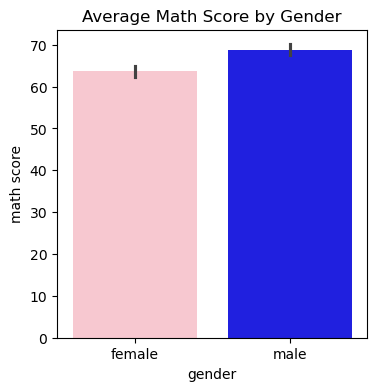

In [49]:
plt.figure(figsize= (4,4))
sns.barplot(data = df, x = 'gender', y = 'math score', palette = {'female': 'pink', 'male': 'blue'}, hue = 'gender')
plt.title('Average Math Score by Gender')
plt.show()


In [51]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


--  Who scored above 90 in all 3 subjects?

In [57]:
df[(df['math score']>90) & (df['reading score']>90) & (df['writing score']>90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.666667
179,female,group D,some high school,standard,completed,97,100,100,99.000000
451,female,group E,some college,standard,none,100,92,97,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
546,female,group A,some high school,standard,completed,92,100,97,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,97.333333
571,male,group A,bachelor's degree,standard,none,91,96,92,93.000000
594,female,group C,bachelor's degree,standard,completed,92,100,99,97.000000


-- Converting Student's Score into Grades

In [63]:
def get_grade(score):
    if score >=90:
        return 'A'
    elif score >=80:
        return 'B'
    elif score >=70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(get_grade)
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B


-- How many students got A, B, C, D, F

In [67]:
df['grade'].value_counts()

grade
F    285
C    261
D    256
B    146
A     52
Name: count, dtype: int64

-- Different lunch type

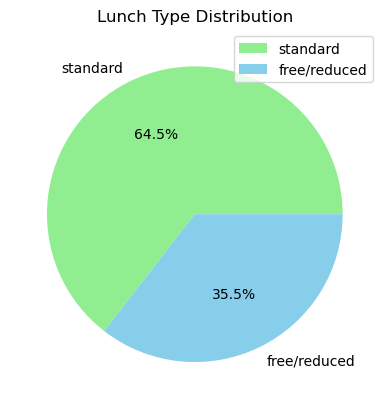

In [73]:
df['lunch'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['lightgreen', 'skyblue'])
plt.legend()
plt.ylabel('')
plt.title('Lunch Type Distribution')
plt.show()